## Initial stab at applying cosine similarity on restaurant menu data
Below uses Uber Eats data from a Kaggle dataset, and does a paraphrase-mining on menu items.

Current stage of the below exploration code is that the data has actually many very similar items from different restaurants that are part of the same restaurant chains, such as McDonalds and this is creating paraphrase mining results that are nearly identical.

A future goal is to dedupe by chain. 

In [1]:
import pandas as pd
from pathlib import Path
from dotenv import dotenv_values
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = dotenv_values()["DATA_DIR"]
HF_TOKEN = dotenv_values()["HF_TOKEN"]

## Pulled data from kaggle here 
https://www.kaggle.com/code/sadeghjalalian/uber-eats-restaurant-menus/input?select=restaurants.csv  

In [95]:
menusdf = pd.read_csv(Path(DATA_DIR) / "restaurant-menus.csv")
menusdf = menusdf[menusdf["description"].notnull()].copy()
restaurantsdf = pd.read_csv(Path(DATA_DIR) / "restaurants.csv")

Some of the descriptions were null, so lets take non-nulls only

In [25]:

menusdf.head()


,restaurant_id,category,name,description,price,category_num_tokens,name_num_tokens,description_num_tokens
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,3,4,2
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,3,3,2
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,3,3,2
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,3,6,2
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,3,4,2


In [5]:
menusdf.shape


(403240, 5)

In [96]:
menusdf[menusdf["description"].isnull()].head()

,restaurant_id,category,name,description,price


## distribution of number of words in category, name, description

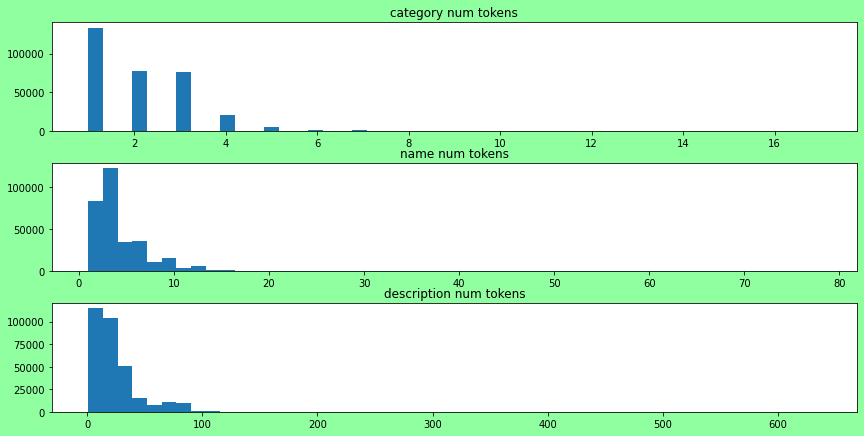

In [101]:
fig, axes = plt.subplots(figsize=(12,6), nrows=3, ncols=1)
fig.patch.set_facecolor("xkcd:mint green")
plt.tight_layout()
for i, col in enumerate(["category", "name", "description"]):

    menusdf[col + "_num_tokens"] = menusdf[col].map(lambda x: len(x.split(" "))) #  if isinstance(x, str) else 0
    ax = axes[i] #fig.add_subplot(int(f"31{i + 1}"))
    
    ax.hist(menusdf[col + "_num_tokens"], bins=50)
    ax.set(title=f"{col} num tokens")

In [105]:
menusdf.sort_values(by="description_num_tokens", ascending=False).head()

,restaurant_id,category,name,description,price,category_num_tokens,name_num_tokens,description_num_tokens
50157,687,Personal Care,Degree Antiperspirant Deodorant Black+White Pu...,Degree is upgrading to our best formula yet. O...,6.79 USD,2,18,637
393401,4887,Personal Care,Degree Antiperspirant Deodorant Black+White Pu...,Degree is upgrading to our best formula yet. O...,6.79 USD,2,18,637
295212,3771,Personal Care,Degree Antiperspirant Deodorant Black+White Pu...,Degree is upgrading to our best formula yet. O...,6.79 USD,2,18,637
171704,2345,Personal Care,Degree Antiperspirant Deodorant Black+White Pu...,Degree is upgrading to our best formula yet. O...,7.29 USD,2,18,637
283238,3631,Beauty,Dove Deep Moisture Body Wash Pump For Dry Skin...,Looking for a skin cleanser that helps you get...,14.49 USD,1,15,556


In [10]:
import random
i = random.randint(1, menusdf.shape[0])
menusdf.iloc[i: i + 10]

,restaurant_id,category,name,description,price,category_num_tokens,name_num_tokens,description_num_tokens
50463,688,Electronics & Office,JLab Audio Wireless Earbuds - 1.0 ea,JBUDS PRO WIRELESS SIGNATURE EARBUDS Ready to ...,31.48 USD,3,7,82
50464,688,Electronics & Office,Infinitive Micro SDHC Memory Card 32GB - 1.0 EA,Stores up to 600 Photos Stores up to 160 minut...,31.48 USD,3,9,60
50465,688,Pets,"PetShoppe Pet Waste Bags 9"" x 12"" - 135.0 ea",15 bags per roll 9 rolls per unit Made in CHINA,9.43 USD,1,10,11
50466,688,Pets,Blue Buffalo Health Bars with Apples & Yogurt ...,Tasty and healthy the perfect complement to yo...,8.17 USD,1,16,38
50467,688,Pets,Beggin Strips Dog Treats Bacon - 6.0 oz,Bacon flavored dog treats with real meat as th...,5.55 USD,1,8,86
50468,688,Pets,PetShoppe Nylon Dog Collar - 1.0 ea,Nylon dog collar for medium dogs. Medium breed...,6.28 USD,1,7,21
50469,688,Pets,PetShoppe Dog Training Pads - 50.0 ea,3.36 sq ft.(22 in X 22 in) Made in CHINA,28.33 USD,1,7,10
50470,688,Pets,Tidy Cats 24/7 Performance Cat Litter - 10.0 lb,"Your Pet, Our Passion. At our company we're un...",4.5 USD,1,9,77
50471,688,Pets,PetShoppe Long Leg Tug Dog Toy Assortment - 1....,Tug my legs. walgreens.com. Questions or comme...,7.33 USD,1,13,11
50472,688,Pets,Iams ProActive Health Cat Food Indoor Weight C...,Helps maintain healthy weight in indoor cats H...,11.53 USD,1,14,74


In [17]:
print(menusdf.category.unique().tolist()[:20])

['Extra Large Pizza', 'Jumbo Wings', 'Spicy Jumbo Wings', 'Chicken Tenders', 'Snacks', 'Candy', 'Pastries', 'Coffee', 'Energy', 'Juice', 'Soda', 'Tea', 'Water', 'Smoothies', 'Espresso Shots', 'Latte', 'Jtizpuccino', 'Teas', 'Desserts', 'Breakfast (All-Day)']


In [70]:
menusdf["concat"] = menusdf.apply(lambda x: f'{x["category"]} {x["name"]} {x["description"]}', axis=1)

In [27]:
menusdf[menusdf["name_num_tokens"] == 0].shape

(0, 8)

## Can we look at cos similarity between all pairs and look at the cos sim distribution 


In [33]:
from sentence_transformers import SentenceTransformer, util
from sentence_transformers.util import semantic_search, cos_sim
import torch

model_name = "all-MiniLM-L12-v2"
embedder = SentenceTransformer(
    #'msmarco-MiniLM-L-6-v3',
    model_name,
    use_auth_token=HF_TOKEN,
)

Signature: random.choices(population, weights=None, *, cum_weights=None, k=1)
Docstring:
Return a k sized list of population elements chosen with replacement.

If the relative weights or cumulative weights are not specified,
the selections are made with equal probability.
File:      ~/opt/miniconda3/envs/pandars310/lib/python3.10/random.py
Type:      method

In [42]:
import numpy as np
model = SentenceTransformer(model_name)
all_sentences = menusdf["concat"].tolist()
sentences = np.random.choice(all_sentences, size=1000, replace=False)
# Choose 1000 first try, 
paraphrases = util.paraphrase_mining(model, sentences)


In [44]:
paraphrases[0]

[1.0000003576278687, 633, 962]

In [50]:
for paraphrase in [row for row in paraphrases if row[0] < .95][:5]:
    score, i, j = paraphrase
    print("{} \n{} \n Score: {:.4f}\n\n".format(sentences[i], sentences[j], score))

Charbroiled Burgers Bacon &amp; Cheese Angus Burger Charbroiled Third Pound 100% black angus beef patty, crisp bacon, melted American cheese, tomato, lettuce, red onion, and mayonnaise, served on a potato bun.
 
Charbroiled Burgers Original Angus Burger Charbroiled Third Pound 100% Angus Beef, melted American cheese, lettuce, tomato, red onions, pickles, mustard, mayonnaise and ketchup, served on a potato bun.  
 Score: 0.9498


Fresh Melts® Ham &amp; Cheese Melt 6 Inch Melt Your cravings called, and we answered with melty goodness and fresh veggies, too. The Ham &amp; Cheese Melt combines Black Forest ham, fresh tomato and American cheese and grills them all up to create an indulgent choice that’s freshly made, too. 
Fresh Melts® Ham &amp; Cheese Melt Footlong Melt Your cravings called, and we answered with melty goodness and fresh veggies, too. The Ham &amp; Cheese Melt combines Black Forest ham, fresh tomato and American cheese and grills them all up to create an indulgent choice th

## maybe should only look for pairs perhaps with different restaurant ids ? 



In [67]:
restaurant_id_map = {i: x for i, x in enumerate(menusdf["restaurant_id"].tolist())}
list(restaurant_id_map.items())[:5]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [58]:
for paraphrase in [row for row in paraphrases 
                   if (row[0] < 1
                   and (restaurant_id_map[row[1]] != restaurant_id_map[row[2]])) 
                  ][:5]:
    score, i, j = paraphrase
    restaurant_id_1, restaurant_id_2 = (restaurant_id_map[i], restaurant_id_map[j])
    print(
        f"{sentences[i]} (restaurant={restaurant_id_1})\n{sentences[j]} (restaurant={restaurant_id_2})\n Score: {score:.4f}\n\n" 
    # .format(sentences[i], sentences[j], score)
         )

Breakfast Black Forest Ham, Egg &amp; Cheese Wrap Helllooo delicious! Enjoy a Spinach wrap filled with American cheese and a double portion of savory Black Forest ham and egg. What a tasty way to start the day! (restaurant=14)
Breakfast Black Forest Ham, Egg &amp; Cheese Wrap Helllooo delicious! Enjoy a Spinach wrap filled with American cheese and a double portion of savory Black Forest ham and egg. What a tasty way to start the day! (restaurant=20)
 Score: 1.0000


Specialties Black Bean Chalupa Supreme® A chewy chalupa shell filled with black beans, reduced-fat sour cream, lettuce, tomatoes, and three-cheese blend. (restaurant=1)
Specialties Black Bean Chalupa Supreme® A chewy chalupa shell filled with black beans, reduced-fat sour cream, lettuce, tomatoes, and three-cheese blend. (restaurant=12)
 Score: 1.0000


Allergy Season Claritin 24 Hour Allergy Relief Tablets - 30.0 ea Claritin√Ç¬Æ tablets provide powerful, 24 hour, non-drowsy relief of your worst indoor and outdoor allergy s

## hmm above did not quite work, 
maybe they are just different restaurants of same chain ? 

In [66]:
print(restaurantsdf.iloc[[20,22]][["id", "position", "name", "category"]])
print(restaurantsdf.iloc[[13, 15]][["id", "position", "name", "category"]])

    id  position                           name  \
20  21        43           Magic City Nutrition   
22  23        37  Golden Temple Vegetarian Cafe   

                                           category  
20  Juice and Smoothies, Bubble Tea, Healthy, Fruit  
22        Juice and Smoothies, Drinks, Comfort Food  
    id  position                                      name  \
13  14        51              Panera (521 Fieldstown Road)   
15  16        88  Jeni's Splendid Ice Cream (Pepper Place)   

                                             category  
13  Breakfast and Brunch, salad, Sandwich, Family ...  
15  Ice Cream &amp; Frozen Yogurt, Comfort Food, D...  


## Hmm ok but think  I have to save original row id actually because when I sampled, now that got changed. 


ok so this time, let me create that restaurant id map off of the sampled df, 

In [78]:
sampledf = menusdf.sample(n=1000).reset_index()
restaurant_id_map = {i: x for i, x in enumerate(sampledf["restaurant_id"].tolist())}
list(restaurant_id_map.items())[:5]
sentences = sampledf["concat"].tolist()
# sentences = np.random.choice(all_sentences, size=1000, replace=False)
# Choose 1000 first try, 
# paraphrases = util.paraphrase_mining(model, sentences)
sentences[:5]

['Mains Breakfast Burrito Flour tortilla stuffed with scrambled eggs, chorizo, cheddar cheese, tomatoes, onions, poblano peppers and avocado.',
 'Picked for you 10" Northside Cheese Chicago Thin Crust Pizza nan',
 'Signature Sides Biscuits nan',
 'Shareables &amp; Sides Otis Spunkmeyer Chocolate Chunk Cookie Soft and chewy classic chocolate chunk cookie.',
 'Omelets Ham and Cheese Omelet Served with hashbrowns.']

In [82]:
restaurants_name_map = {x}

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,12,Legend Larry's,NaN,NaN,"Wings, American, Fast Food",$$,"921 S 10th St, Manitowoc, WI, 54220",54220,44.089550,-87.660370
4996,4997,7,Subway (311 N Rapids Rd),NaN,NaN,"Fast Food, Sandwich, American",$,"311 N Rapids Rd, Manitowoc, WI, 54220",54220,44.098060,-87.700210
4997,4998,1,Walgreens (2702 CALUMET AVE),NaN,NaN,"Pharmacy, Convenience, Everyday Essentials, Baby",$,"2702 Calumet Ave, Manitowoc, WI, 54220",54220,44.087770,-87.681570
4998,4999,2,Panda Express (4510 Calumet Ave.),NaN,NaN,"Asian, Chinese, Family Meals",$,"4510 Calumet Ave., Manitowoc, WI, 54220",54220,44.074012,-87.705800


In [79]:
paraphrases = util.paraphrase_mining(model, sentences)

In [81]:
# paraphrases_with_restaurant_ids = [x for x in paraphrases ]
for paraphrase in [row for row in paraphrases 
                   if (row[0] < .99
                   and (restaurant_id_map[row[1]] != restaurant_id_map[row[2]])) 
                  ][:5]:
    score, i, j = paraphrase
    restaurant_id_1, restaurant_id_2 = (restaurant_id_map[i], restaurant_id_map[j])
    print(
        f"{sentences[i]} (restaurant={restaurant_id_1})\n{sentences[j]} (restaurant={restaurant_id_2})\n Score: {score:.4f}\n\n" 
    # .format(sentences[i], sentences[j], score)
         )

Family Bucket Meals 12 pc. Family Bucket Meal Feeds 5-6. 12 pieces of our freshly prepared World Famous Chicken, available in Original Recipe or Extra Crispy, 3 large sides of your choice, and 6 biscuits. (restaurant=1643)
Family Bucket Meals 8 pc. Family Bucket Meal Feeds 3-4. 8 pieces of our freshly prepared World Famous Chicken, available in Original Recipe or Extra Crispy, 2 large sides of your choice, and 4 biscuits. (restaurant=1230)
 Score: 0.9899


Family Bucket Meals 12 pc. Family Bucket Meal Feeds 5-6. 12 pieces of our freshly prepared World Famous Chicken, available in Original Recipe or Extra Crispy, 3 large sides of your choice, and 6 biscuits. (restaurant=1643)
Family Bucket Meals 8 pc. Family Bucket Meal Feeds 3-4. 8 pieces of our freshly prepared World Famous Chicken, available in Original Recipe or Extra Crispy, 2 large sides of your choice, and 4 biscuits. (restaurant=872)
 Score: 0.9899


Baby & Kids Huggies Pull-Ups Girls' Potty Training Pants Size 5 - 20.0 ea Pull-

In [84]:
print(restaurantsdf.iloc[[572, 3820]][["id", "position", "name",]])
print(restaurantsdf.iloc[[1543, 3820]][["id", "position", "name",]])

        id  position                             name
572    573        48     McDonald's® (2251 REEVES ST)
3820  3821         7  McDonald's® (7060 GREEN BAY RD)
        id  position                             name
1543  1544         1   McDonald's® (Lawe &amp; Sarah)
3820  3821         7  McDonald's® (7060 GREEN BAY RD)


## ok cool, per above, seeing they're mcdonalds so can explain menu similarity
So later can try to dedupe perhaps then. 

In [85]:
# paraphrases_with_restaurant_ids = [x for x in paraphrases ]
for paraphrase in [row for row in paraphrases 
                   if (row[0] < .95
                   and (restaurant_id_map[row[1]] != restaurant_id_map[row[2]])) 
                  ][:5]:
    score, i, j = paraphrase
    restaurant_id_1, restaurant_id_2 = (restaurant_id_map[i], restaurant_id_map[j])
    print(
        f"{sentences[i]} (restaurant={restaurant_id_1})\n{sentences[j]} (restaurant={restaurant_id_2})\n Score: {score:.4f}\n\n" 
    # .format(sentences[i], sentences[j], score)
         )

Beverage Pepsi nan (restaurant=1098)
Drinks Pepsi® nan (restaurant=3498)
 Score: 0.9441


Drinks &amp; Desserts Iced Tea If you weren’t already craving an ice cold, refreshing beverage…you are now. (restaurant=2444)
Drinks &amp; Desserts Soft Drinks If you weren’t already craving an ice cold, refreshing beverage…you are now. (restaurant=1598)
 Score: 0.9388


Beverages Milk nan (restaurant=2678)
Beverages Cup of Milk nan (restaurant=2393)
 Score: 0.9376


Beverages Mountain Dew nan (restaurant=2983)
Drinks Mountain Dew nan (restaurant=4128)
 Score: 0.9331


Specialties Cheesy Roll Up A warm flour tortilla filled with our 3-cheese blend. Item is lacto-ovo, allowing for dairy &amp; egg consumption. Preparation methods may lead to cross contact with meat. See ta.co for full details. (restaurant=1574)
New Cravings Value Menu Cheesy Roll Up A warm flour tortilla filled with our 3-cheese blend. Item is lacto-ovo, allowing for dairy &amp; egg consumption. Preparation methods may lead to cross

In [ ]:
corpus = 
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

## Lets embed all the stuff and lets look at how they look within that 2d embedding space 
Lets use cohere and its dense retrieval 

In [9]:
import cohere
import umap
import altair as alt

In [10]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings


In [11]:
from jovyan_utils import umap_plot

In [12]:


corpus = ["Everybody Loves Raymond",
         "blood vessels go into a temporary spasm",
         "blocked flow of blood in fingers",
         "Everybody Loves Numbness",
         "Everybody Loves cold fingers",
         "Everybody Loves Reindeer",
         "Everybody Loves Riynudno"]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

query = "Everybody Loves Raynaud"
query_embedding = embedder.encode(query, convert_to_tensor=True)

cos_scores = cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=7)

cos_scores, top_results

print("Query:\n", query, "\n")

for score, idx in zip(top_results[0], top_results[1]):
    print(corpus[idx].strip(), "(Score: {:.4f})".format(score))


Query:
 Everybody Loves Raynaud 

Everybody Loves cold fingers (Score: 0.4929)
Everybody Loves Numbness (Score: 0.4379)
blocked flow of blood in fingers (Score: 0.4075)
Everybody Loves Riynudno (Score: 0.3814)
Everybody Loves Raymond (Score: 0.3706)
blood vessels go into a temporary spasm (Score: 0.3055)
Everybody Loves Reindeer (Score: 0.2809)


In [13]:
corpus_embeddings

tensor([[-0.0386, -0.0912, -0.0590,  ...,  0.0342,  0.0336, -0.0264],
        [-0.0397,  0.0058,  0.0856,  ...,  0.0248,  0.0532, -0.0036],
        [-0.0416, -0.0047,  0.0063,  ..., -0.0189, -0.0552,  0.0395],
        ...,
        [-0.1101, -0.0767, -0.0392,  ..., -0.0364, -0.0638,  0.0770],
        [-0.0927,  0.0005,  0.0201,  ..., -0.0289,  0.0254, -0.0414],
        [-0.1215, -0.1445, -0.0009,  ...,  0.0009,  0.0678, -0.0409]])

In [14]:
emb = corpus_embeddings.tolist()

In [ ]:
reducer = umap.UMAP(n_neighbors=2)
umap_embeds = reducer.fit_transform(emb)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
sentences = pd.DataFrame({"text": corpus})
chart = umap_plot(sentences, corpus_embeddings)
chart.interactive()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
corpus_embeddings[:, :3]
